### Importacion de librerias 

In [22]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Extraer datos

In [24]:
df = pd.read_csv("../data/clean_dataset.csv")
df

,Freedom,Happiness_Rank,Perceptions_of_corruption,Happiness_Score,Social_support,Economic_Health_Index,region_Australia and New Zealand,region_Central and Eastern Europe,region_Eastern Asia,region_Latin America and Caribbean,...,region_North America,region_Southeastern Asia,region_Southern Asia,region_Sub-Saharan Africa,region_Western Europe,Year_Year_2015,Year_Year_2016,Year_Year_2017,Year_Year_2018,Year_Year_2019
0,0.66557,1,0.41978,7.587,1.34951,1.772106,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0.62877,2,0.14145,7.561,1.40223,1.626761,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0.64938,3,0.48357,7.527,1.36058,1.458406,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0.66973,4,0.36503,7.522,1.33095,1.720453,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.63297,5,0.32957,7.427,1.32261,1.548120,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.55500,152,0.41100,3.334,0.71100,-0.963090,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
778,0.41700,153,0.14700,3.231,0.88500,-1.087552,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
779,0.00000,154,0.02500,3.203,0.51700,-1.699650,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
780,0.22500,155,0.03500,3.083,0.00000,-2.991922,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Entrenamiento de los modelos

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Variables predictoras y objetivo
X = df.drop(columns=['Happiness_Score'])
y = df['Happiness_Score']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Evaluar modelos
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        'Modelo': name,
        'R² Score': round(r2_score(y_test, y_pred), 4)
    })

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

print("\nResultados de los Modelos:")
print(results_df.to_string(index=False))



Resultados de los Modelos:
           Modelo  R² Score
          XGBoost    0.9974
    Random Forest    0.9970
Gradient Boosting    0.9963
 Ridge Regression    0.9864
Linear Regression    0.9863
 Lasso Regression    0.9856


### Otras metricas 

In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Resultados de métricas
results = []

for name, model in models.items():
    # R² por validación cruzada
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    
    # Ajustar y predecir en un fold de ejemplo (train/test split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    results.append({
        'Modelo': name,
        'R² CV Mean': round(np.mean(r2_scores), 4),
        'R² CV Std': round(np.std(r2_scores), 4),
        'MAE': round(mae, 4),
        'RMSE': round(rmse, 4)
    })


# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² CV Mean', ascending=False).reset_index(drop=True)

print("\nResultados con Validación Cruzada (5 folds):")
print(results_df.to_string(index=False))



Resultados con Validación Cruzada (5 folds):
           Modelo  R² CV Mean  R² CV Std    MAE   RMSE
          XGBoost      0.9969     0.0008 0.0419 0.0566
    Random Forest      0.9969     0.0007 0.0469 0.0605
Gradient Boosting      0.9964     0.0006 0.0525 0.0670
Linear Regression      0.9870     0.0017 0.0970 0.1293
 Ridge Regression      0.9870     0.0017 0.0964 0.1286
 Lasso Regression      0.9841     0.0020 0.1015 0.1325


### 

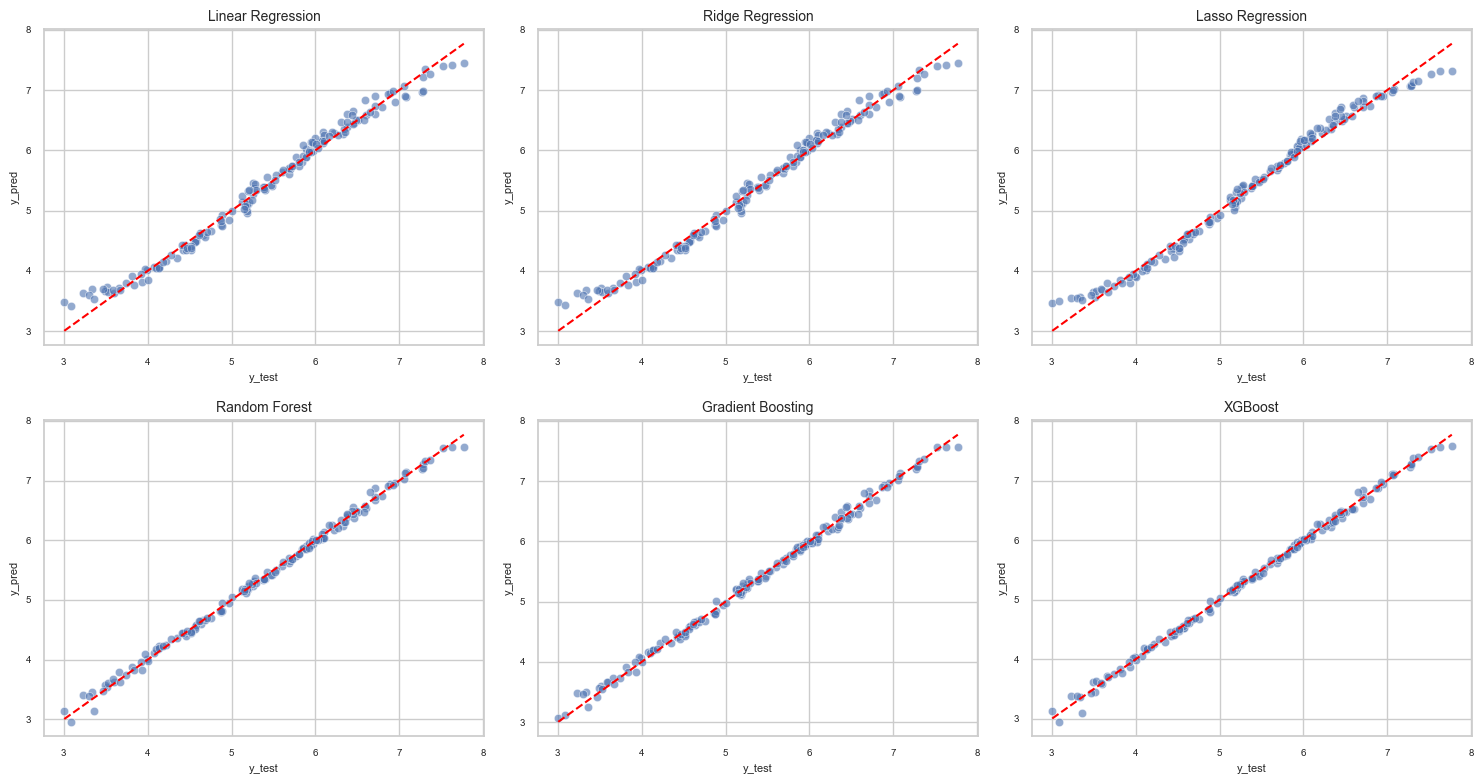

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()  # Aplanamos para iterar fácilmente

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ax = axes[i]
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_title(name, fontsize=10)
    ax.set_xlabel("y_test", fontsize=8)
    ax.set_ylabel("y_pred", fontsize=8)
    ax.tick_params(labelsize=7)

# Si hay más subplots de los que necesitamos, los apagamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

